In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/CNN-IBM

/content/drive/MyDrive/CNN-IBM


In [ ]:
pwd

'/content/drive/MyDrive/CNN-IBM'

Import the ImageDataGenerator library

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

Configure ImageDataGenerator Class

In [36]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,vertical_flip=True,horizontal_flip=True) 

In [ ]:
test_data=ImageDataGenerator(rescale=1./255)

Apply ImageDataGenerator functionality to trainset and testset

In [86]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN-IBM/Dataset/TRAIN_SET",target_size=(64,64),class_mode="categorical",batch_size=128)

Found 4118 images belonging to 5 classes.


In [87]:
x_test=test_data.flow_from_directory(r"/content/drive/MyDrive/CNN-IBM/Dataset/TEST_SET",target_size=(64,64),class_mode="categorical",batch_size=128)

Found 929 images belonging to 5 classes.


In [88]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

MODEL BUILDING

Import the libraries

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

Initialize the model

In [90]:
model=Sequential()

Adding CNN layers

In [94]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [95]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [96]:
model.add(Flatten())

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


Adding Dense layer

Hidden layer

In [98]:
model.add(Dense(500,activation="relu"))

In [99]:
model.add(Dense(500,activation="relu"))

Output layer

In [100]:
model.add(Dense(6,activation="softmax"))

Configure the learning process

In [101]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [104]:
len(x_train)

33

Train the model

In [ ]:
model.fit(x_train,epochs=5,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Save the model

In [111]:
model.save('nutrition.h5')

In [112]:
from tensorflow.keras.models import load_model

In [113]:
model=load_model('nutrition.h5')

Testing the model

In [114]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [115]:
model=load_model('nutrition.h5')

In [118]:
img=image.load_img("/content/drive/MyDrive/CNN-IBM/Dataset/TRAIN_SET/ORANGE/n07749192_1008.jpg",target_size=(64,64))

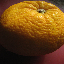

In [119]:
img

In [120]:
x=image.img_to_array(img)

In [121]:
x

array([[[ 51.,  23.,  19.],
        [ 52.,  22.,  20.],
        [ 52.,  24.,  21.],
        ...,
        [ 36.,  33.,  28.],
        [ 41.,  38.,  33.],
        [ 38.,  39.,  31.]],

       [[ 50.,  25.,  21.],
        [ 56.,  25.,  22.],
        [ 60.,  26.,  24.],
        ...,
        [ 35.,  34.,  29.],
        [ 40.,  37.,  32.],
        [ 31.,  32.,  24.]],

       [[ 55.,  24.,  22.],
        [ 59.,  25.,  23.],
        [ 61.,  30.,  27.],
        ...,
        [ 52.,  52.,  40.],
        [ 46.,  48.,  37.],
        [ 51.,  49.,  37.]],

       ...,

       [[  7.,   7.,   5.],
        [  8.,   8.,   8.],
        [ 10.,   8.,   9.],
        ...,
        [113.,  41.,  42.],
        [110.,  39.,  37.],
        [109.,  38.,  44.]],

       [[  8.,   8.,   8.],
        [  9.,   7.,   8.],
        [  9.,   9.,   9.],
        ...,
        [101.,  40.,  39.],
        [107.,  37.,  37.],
        [107.,  37.,  39.]],

       [[  7.,   7.,   7.],
        [  7.,   7.,   7.],
        [  9.,  

In [122]:
x=np.expand_dims(x,axis=0)

In [123]:
x

array([[[[ 51.,  23.,  19.],
         [ 52.,  22.,  20.],
         [ 52.,  24.,  21.],
         ...,
         [ 36.,  33.,  28.],
         [ 41.,  38.,  33.],
         [ 38.,  39.,  31.]],

        [[ 50.,  25.,  21.],
         [ 56.,  25.,  22.],
         [ 60.,  26.,  24.],
         ...,
         [ 35.,  34.,  29.],
         [ 40.,  37.,  32.],
         [ 31.,  32.,  24.]],

        [[ 55.,  24.,  22.],
         [ 59.,  25.,  23.],
         [ 61.,  30.,  27.],
         ...,
         [ 52.,  52.,  40.],
         [ 46.,  48.,  37.],
         [ 51.,  49.,  37.]],

        ...,

        [[  7.,   7.,   5.],
         [  8.,   8.,   8.],
         [ 10.,   8.,   9.],
         ...,
         [113.,  41.,  42.],
         [110.,  39.,  37.],
         [109.,  38.,  44.]],

        [[  8.,   8.,   8.],
         [  9.,   7.,   8.],
         [  9.,   9.,   9.],
         ...,
         [101.,  40.,  39.],
         [107.,  37.,  37.],
         [107.,  37.,  39.]],

        [[  7.,   7.,   7.],
       

In [124]:
pred=model.predict(x)

1/1 [==============================] - 0s 124ms/step


In [125]:
pred

array([[3.0380558e-15, 8.5699292e-13, 9.9998498e-01, 5.6462517e-07,
        1.4380068e-05, 3.1803251e-21]], dtype=float32)

In [126]:
index=['APPLES','BANANA','ORANGE','WATERMELON','PINEAPPLE']

In [127]:
index[np.argmax(pred)]

'ORANGE'